In [2]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn


In [3]:

sklearn.__version__

'1.2.2'

In [4]:
ser=pd.read_csv("heart-disease.csv")
ser

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [5]:
#cheecking the datatypes
ser.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
#Checking if any data is missing
ser.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
X=ser.drop("target",axis=1)
y=ser["target"]

In [8]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [9]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [10]:
y.value_counts()

target
1    165
0    138
Name: count, dtype: int64

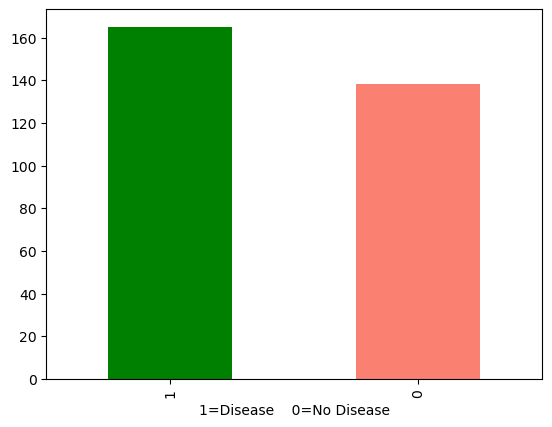

In [11]:
ser.target.value_counts().plot(kind="bar",color=["green","salmon"],x="value 0 and 1",y="numbers")
plt.xlabel("1=Disease    0=No Disease");

In [12]:
ser.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [13]:
#Women 0 ,Men 1
pd.crosstab(ser.target,ser.sex)

sex,0,1
target,,
0,24,114
1,72,93


In [14]:
pd.crosstab(ser.target,ser.fbs)

fbs,0,1
target,,
0,116,22
1,142,23


In [15]:
pd.crosstab(ser.target,ser.exang)

exang,0,1
target,,
0,62,76
1,142,23


In [16]:
pd.crosstab(ser.target,ser.restecg)

restecg,0,1,2
target,,,
0,79,56,3
1,68,96,1


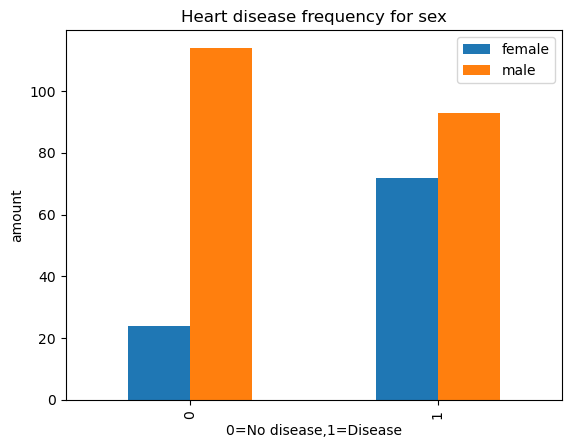

In [17]:
pd.crosstab(ser.target,ser.sex).plot(kind="bar")
plt.title("Heart disease frequency for sex")
plt.xlabel("0=No disease,1=Disease")
plt.ylabel("amount")
plt.legend(["female","male"]);



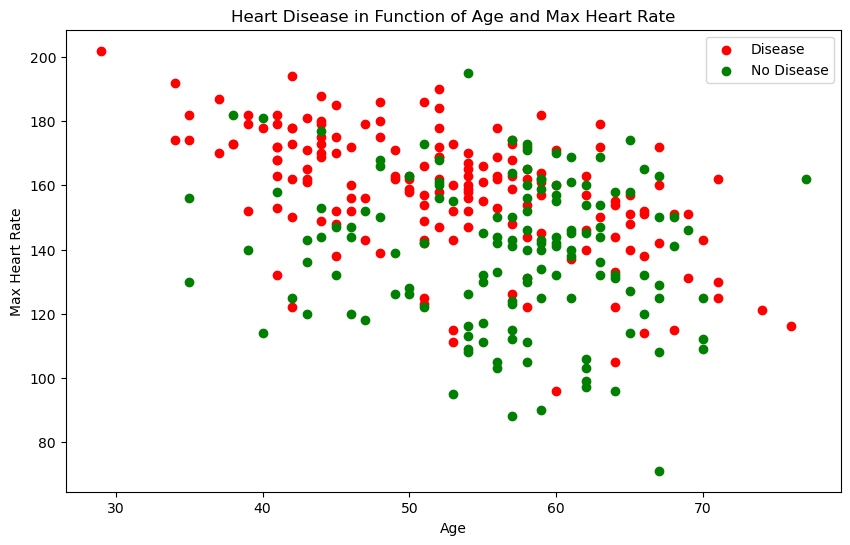

In [18]:
plt.figure(figsize=(10,6))
#positive examples
plt.scatter(ser.age[ser.target==1],
           ser.thalach[ser.target==1],
           c="red")

#negative examples
plt.scatter(ser.age[ser.target==0],
           ser.thalach[ser.target==0],
           c="green")

plt.title("Heart Disease in Function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease","No Disease"])

In [19]:
ser.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


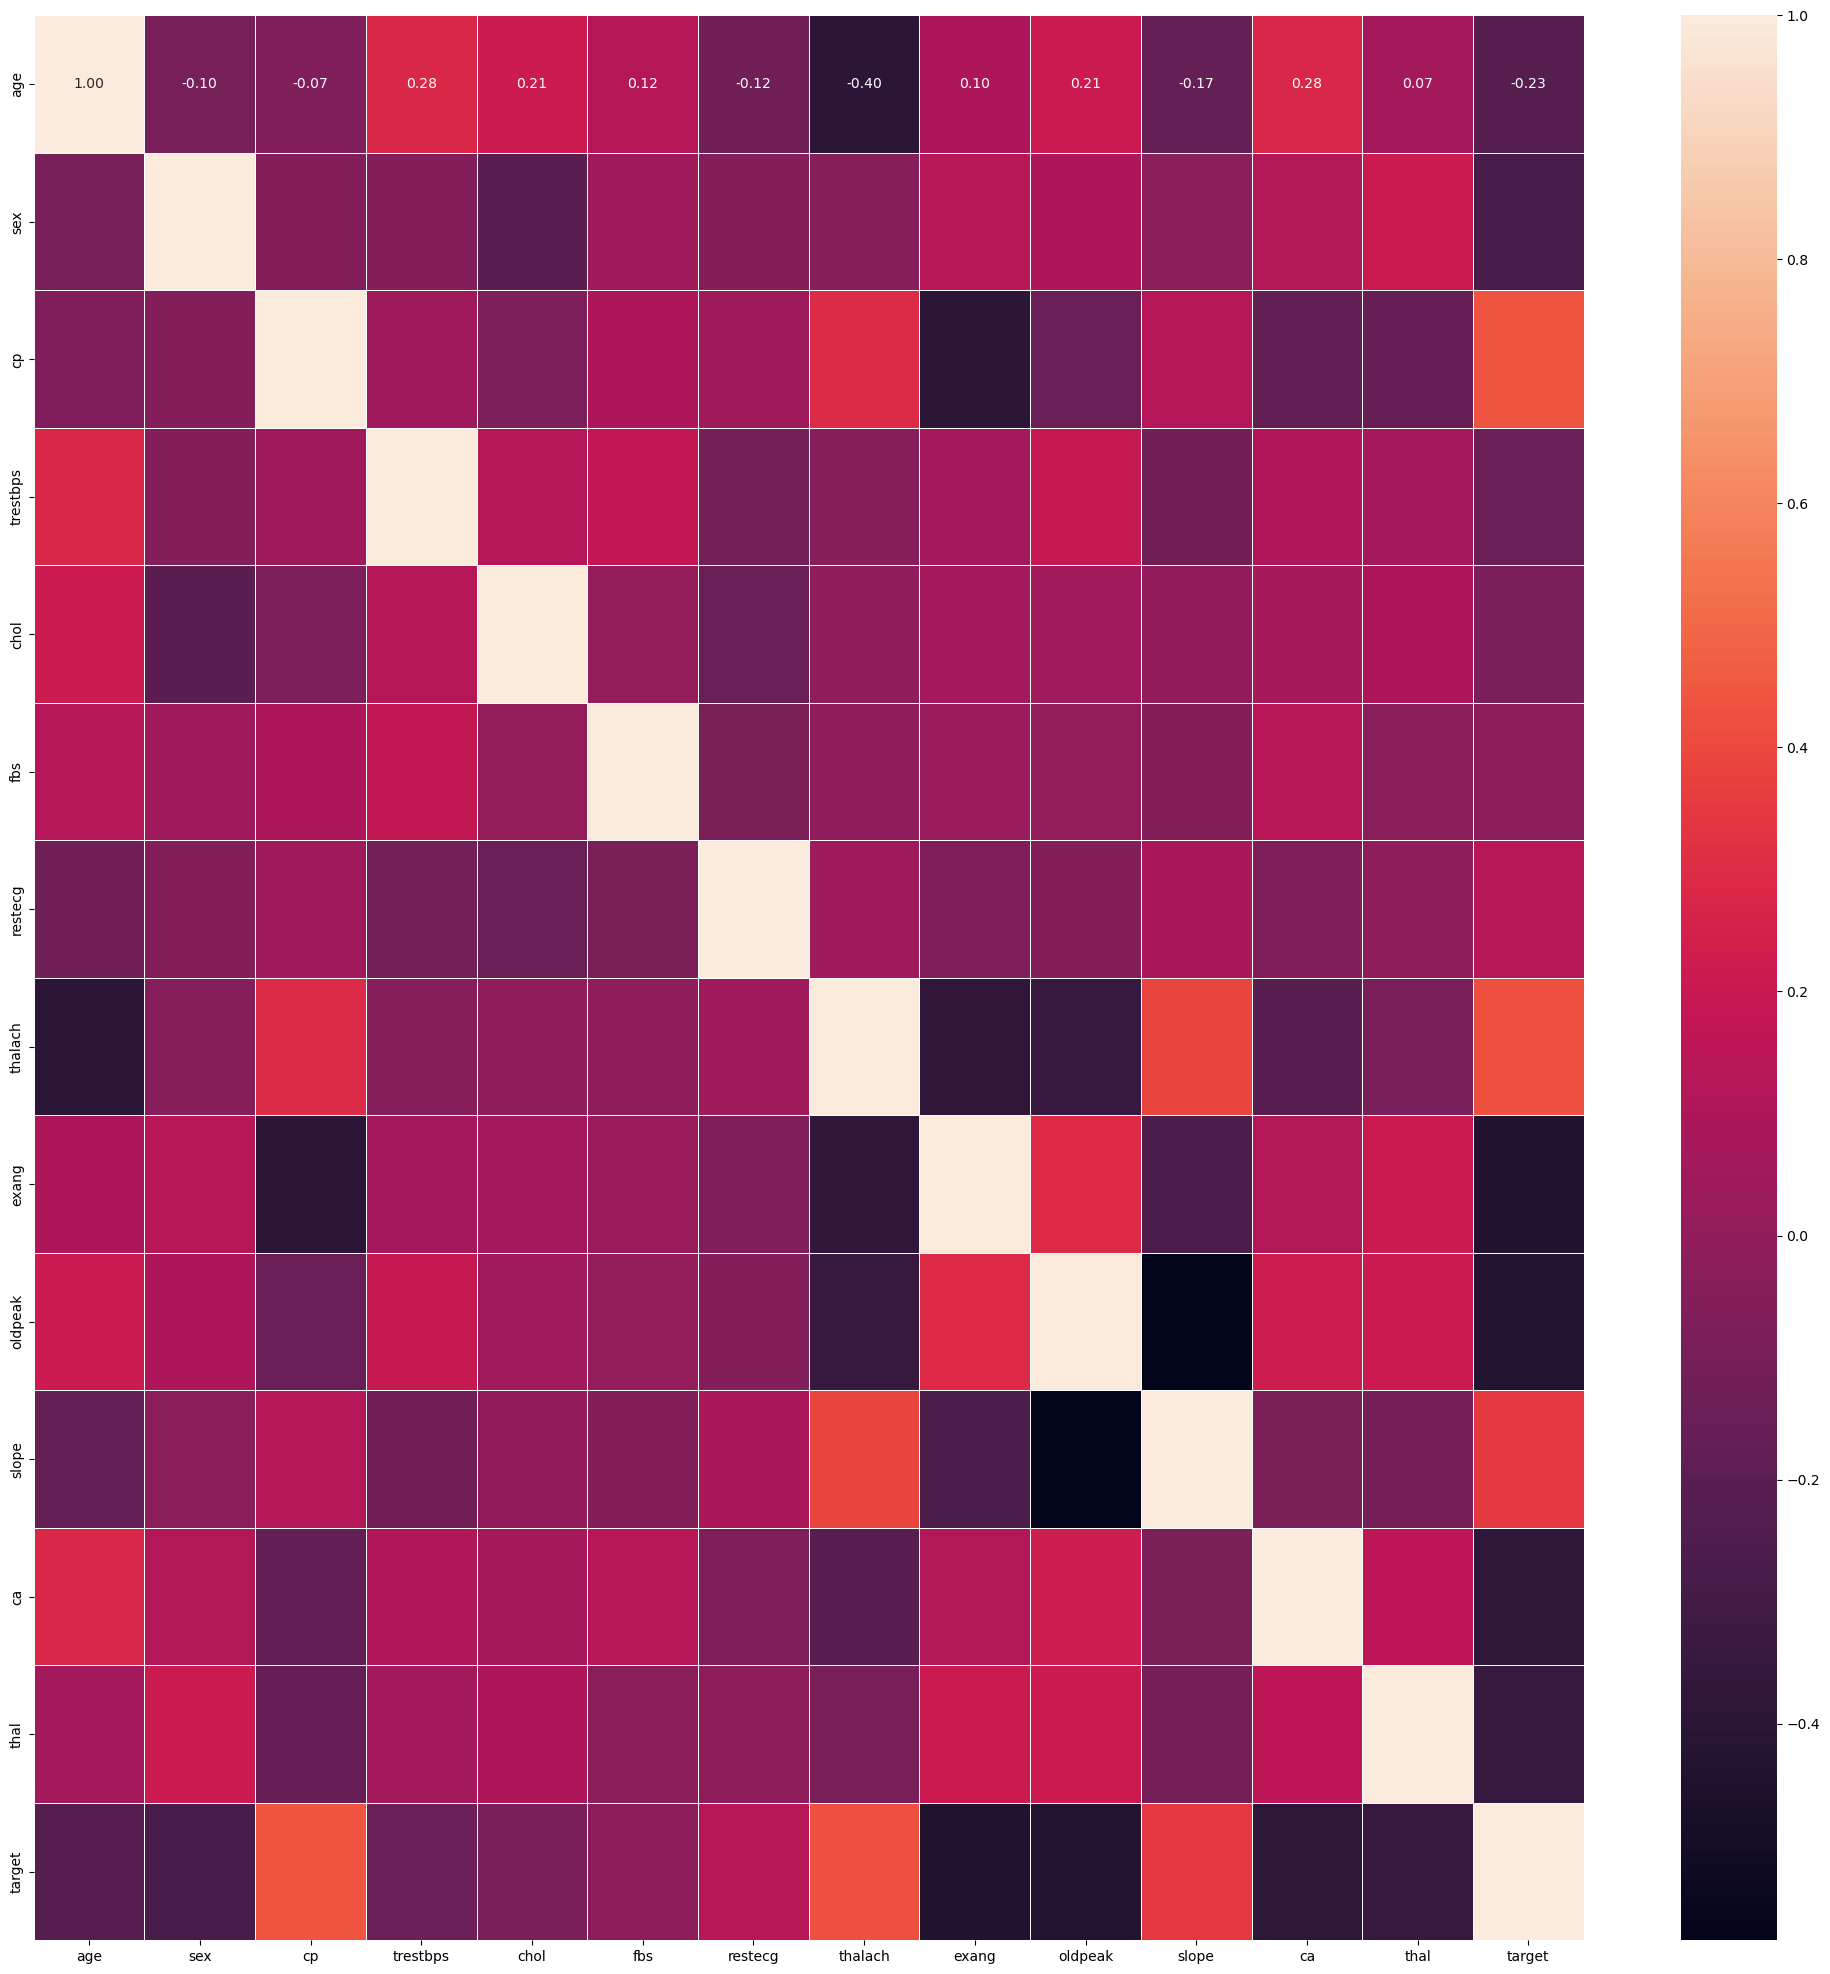

In [20]:
corr=ser.corr()
fig,ax=plt.subplots(figsize=(25,25))
ax=sns.heatmap(corr,annot=True,linewidths=0.5,fmt=".2f")

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
np.random.seed(2)
clf=RandomForestClassifier(n_estimators=89)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
clf.fit(X_train,y_train)
print(clf.score(X_test,y_test))

0.9016393442622951


In [22]:
# from sklearn.linear_model import LogisticRegression

# np.random.seed(2)
# clf1=LogisticRegression()
# X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
# clf1.fit(X_train,y_train)
# print(clf1.score(X_test,y_test))

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
np.random.seed(2)
for i in range(1,101):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
    clf=RandomForestClassifier(n_estimators=i).fit(X_train,y_train)
    print(i,clf.score(X_test,y_test))

1 0.7868852459016393
2 0.7213114754098361
3 0.7868852459016393
4 0.6557377049180327
5 0.9180327868852459
6 0.7868852459016393
7 0.7540983606557377
8 0.8032786885245902
9 0.7540983606557377
10 0.8032786885245902
11 0.8524590163934426
12 0.7868852459016393
13 0.7704918032786885
14 0.7704918032786885
15 0.8524590163934426
16 0.8524590163934426
17 0.8688524590163934
18 0.8032786885245902
19 0.7704918032786885
20 0.8360655737704918
21 0.8032786885245902
22 0.8032786885245902
23 0.819672131147541
24 0.8032786885245902
25 0.8524590163934426
26 0.8360655737704918
27 0.8032786885245902
28 0.7868852459016393
29 0.8852459016393442
30 0.7704918032786885
31 0.8688524590163934
32 0.7377049180327869
33 0.8524590163934426
34 0.819672131147541
35 0.8688524590163934
36 0.819672131147541
37 0.8360655737704918
38 0.819672131147541
39 0.7704918032786885
40 0.8524590163934426
41 0.8360655737704918
42 0.8032786885245902
43 0.7868852459016393
44 0.819672131147541
45 0.8360655737704918
46 0.8852459016393442
47

In [24]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split
# np.random.seed(2)

# X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
# clf=RandomForestClassifier(n_estimators=69).fit(X_train,y_train)
# print(clf.score(X_test,y_test))

In [25]:
from sklearn.linear_model import LogisticRegression


for i in range(1,50):
    np.random.seed(i)
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
    clf=LogisticRegression().fit(X_train,y_train)
    print(i,clf.score(X_test,y_test))

1 0.7704918032786885
2 0.9016393442622951
3 0.8688524590163934
4 0.9016393442622951
5 0.9180327868852459
6 0.8360655737704918
7 0.7540983606557377
8 0.8688524590163934
9 0.8360655737704918
10 0.7704918032786885
11 0.819672131147541
12 0.7868852459016393
13 0.8360655737704918
14 0.7868852459016393
15 0.8360655737704918
16 0.8032786885245902
17 0.819672131147541
18 0.8360655737704918
19 0.7868852459016393
20 0.7377049180327869
21 0.819672131147541
22 0.8032786885245902
23 0.819672131147541
24 0.8688524590163934
25 0.7704918032786885
26 0.8360655737704918
27 0.9016393442622951
28 0.8688524590163934
29 0.8852459016393442
30 0.8524590163934426
31 0.8524590163934426
32 0.819672131147541
33 0.819672131147541
34 0.8524590163934426
35 0.8360655737704918
36 0.8032786885245902
37 0.8360655737704918
38 0.819672131147541
39 0.8360655737704918
40 0.9016393442622951
41 0.7868852459016393
42 0.8852459016393442
43 0.8852459016393442
44 0.8360655737704918
45 0.9016393442622951
46 0.819672131147541
47 0.

In [26]:
from sklearn.neighbors import KNeighborsClassifier
np.random.seed(83)
for i in range(1,100):
   
   
    clf1=KNeighborsClassifier(n_neighbors=i)
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
    clf1.fit(X_train,y_train) 
    print(i,clf1.score(X_test,y_test))

1 0.6721311475409836
2 0.6229508196721312
3 0.7377049180327869
4 0.6721311475409836
5 0.6721311475409836
6 0.6721311475409836
7 0.6065573770491803
8 0.6721311475409836
9 0.7049180327868853
10 0.6557377049180327
11 0.6229508196721312
12 0.6557377049180327
13 0.6721311475409836
14 0.5901639344262295
15 0.6557377049180327
16 0.5901639344262295
17 0.6885245901639344
18 0.6721311475409836
19 0.7049180327868853
20 0.7704918032786885
21 0.6557377049180327
22 0.6065573770491803
23 0.639344262295082
24 0.6721311475409836
25 0.5737704918032787
26 0.7049180327868853
27 0.7704918032786885
28 0.6557377049180327
29 0.6721311475409836
30 0.6885245901639344
31 0.7377049180327869
32 0.5737704918032787
33 0.6557377049180327
34 0.6557377049180327
35 0.6721311475409836
36 0.7377049180327869
37 0.6721311475409836
38 0.5901639344262295
39 0.5081967213114754
40 0.6557377049180327
41 0.5737704918032787
42 0.7377049180327869
43 0.6229508196721312
44 0.6557377049180327
45 0.6721311475409836
46 0.540983606557377

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
np.random.seed(2)
clf=RandomForestClassifier(n_estimators=89)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
clf.fit(X_train,y_train)
print(clf.score(X_test,y_test))

0.9016393442622951


In [28]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.model_selection import train_test_split
# grid={"n_estimators":[45,23,456,78,2,345,1,4,78,34,44,56],}
# np.random.seed(2)

# clf1=RandomForestClassifier(n_jobs=1)
# X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
# rs_clf1=RandomizedSearchCV(estimator=clf1,param_distributions=grid,n_iter=25,cv=7)
# rs_clf1.fit(X_train,y_train)
# rs_clf1.best_params_



In [29]:
y_preds=clf.predict(X_test)
y_preds=pd.Series(y_preds)
y_preds.value_counts()

1    33
0    28
Name: count, dtype: int64

In [30]:
y_test.value_counts()

target
0    32
1    29
Name: count, dtype: int64

In [31]:
y_preds

0     1
1     0
2     1
3     1
4     0
     ..
56    0
57    1
58    1
59    0
60    1
Length: 61, dtype: int64

In [32]:
y_test

99     1
296    0
89     1
30     1
234    0
      ..
173    0
94     1
161    1
216    0
91     1
Name: target, Length: 61, dtype: int64

In [33]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.model_selection import train_test_split
# grid={"n_estimators":[45,23,456,78,2,345,1,4,78,34,44,56],}
# np.random.seed(2)

# clf1=RandomForestClassifier(n_jobs=1)
# X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
# rs_clf1=RandomizedSearchCV(estimator=clf1,param_distributions=grid,n_iter=25,cv=7)
# rs_clf1.fit(X_train,y_train)
# rs_clf1.best_params_



In [34]:
from sklearn.metrics import precision_score,accuracy_score,f1_score,recall_score
def evaluate(y_true,y_preds):
    accuracy=accuracy_score(y_true,y_preds)
    precision=precision_score(y_true,y_preds)
    recall=recall_score(y_true,y_preds)
    f1=f1_score(y_true,y_preds)
    print(f"accuarcy is {accuracy},precision is {precision}recall is {recall},f1 is {f1}")
    

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
grid={"n_estimators":[10,100,200,500,1000,1200],
      "max_depth":[None,5,10,20,40],
      "max_features":["auto","sqrt"],
     "min_samples_split":[2,4,6],
     "min_samples_leaf":[1,2,4]}
np.random.seed(2)

clf1=RandomForestClassifier(n_jobs=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
rs_clf1=RandomizedSearchCV(estimator=clf1,param_distributions=grid,n_iter=10,cv=5,verbose=2)
rs_clf1.fit(X_train,y_train)



rs_y_preds=rs_clf1.predict(X_test)
rs_metrics=evaluate(y_test,rs_y_preds)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=

In [36]:
clf

RandomForestClassifier(n_estimators=89)

In [37]:
rs_clf1.best_params_

{'n_estimators': 500,
 'min_samples_split': 6,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 10}

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
np.random.seed(2)
clf2=RandomForestClassifier(n_estimators=10,min_samples_split=2,min_samples_leaf=4,max_features="sqrt",max_depth=5)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
clf2.fit(X_train,y_train)
print(clf2.score(X_test,y_test))

0.8524590163934426


In [39]:
clf


RandomForestClassifier(n_estimators=89)

In [40]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import train_test_split
# grid={"n_estimators":[10,100,200,500,1000,1200],
#       "max_depth":[None,5,10,20,40],
#       "max_features":["auto","sqrt"],
#      "min_samples_split":[2,4,6],
#      "min_samples_leaf":[1,2,4]}
# np.random.seed(2)

# clf1=RandomForestClassifier(n_jobs=1)
# X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
# gs_clf1=GridSearchCV(estimator=clf1,param_grid=grid,cv=5,verbose=2)
# gs_clf1.fit(X_train,y_train)

# gs_clf1.best_params_

# # gs_y_preds=gs_clf1.predict(X_test)
# # gs_metrics=evaluate(y_test,gs_y_preds)

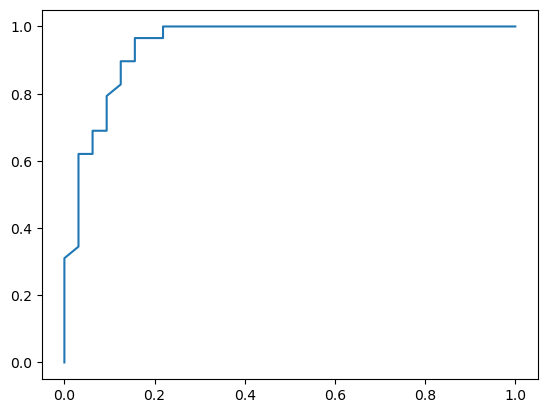

In [41]:
#ROC CURVE
from sklearn.metrics import roc_curve,roc_auc_score
y_proba=clf.predict_proba(X_test)

y_proba_positive=y_proba[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_proba_positive)
y_preds=clf.predict(X_test)
plt.plot(fpr,tpr)

<Axes: >

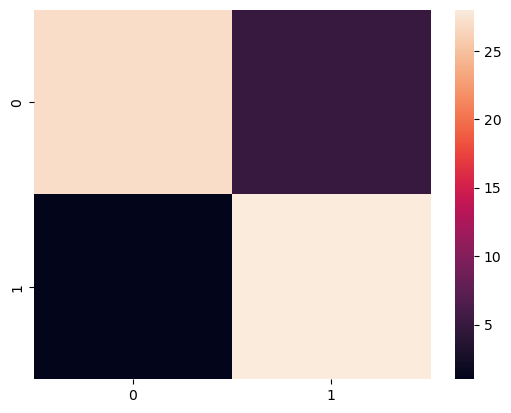

In [42]:
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
y_preds=clf.predict(X_test)
c=confusion_matrix(y_test,y_preds)
sns.heatmap(c)
    

In [43]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.96      0.84      0.90        32
           1       0.85      0.97      0.90        29

    accuracy                           0.90        61
   macro avg       0.91      0.90      0.90        61
weighted avg       0.91      0.90      0.90        61



In [44]:
from sklearn.model_selection import cross_val_score
print(np.mean(cross_val_score(estimator=clf,X=X,y=y,cv=5,scoring=None)))


0.8183606557377049


In [45]:
print(np.mean(cross_val_score(estimator=clf,X=X,y=y,cv=5,scoring="accuracy")))

0.834808743169399


In [46]:
print(np.mean(cross_val_score(estimator=clf,X=X,y=y,cv=5,scoring="precision")))

0.8211718799218799


In [47]:
f=clf.feature_importances_

In [48]:
ser

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [49]:
f

array([0.08531317, 0.03478529, 0.12724405, 0.08161965, 0.08249603,
       0.01010536, 0.02433851, 0.13048056, 0.05812428, 0.10811643,
       0.05360709, 0.10842666, 0.09534291])

In [50]:
f_series = pd.Series(f)

# Create a dictionary using the column names of ser and the values from f_series
f_dict = dict(zip(ser.columns, [f_series.iloc[0]] * len(ser.columns)))
f_series

0     0.085313
1     0.034785
2     0.127244
3     0.081620
4     0.082496
5     0.010105
6     0.024339
7     0.130481
8     0.058124
9     0.108116
10    0.053607
11    0.108427
12    0.095343
dtype: float64

<BarContainer object of 13 artists>

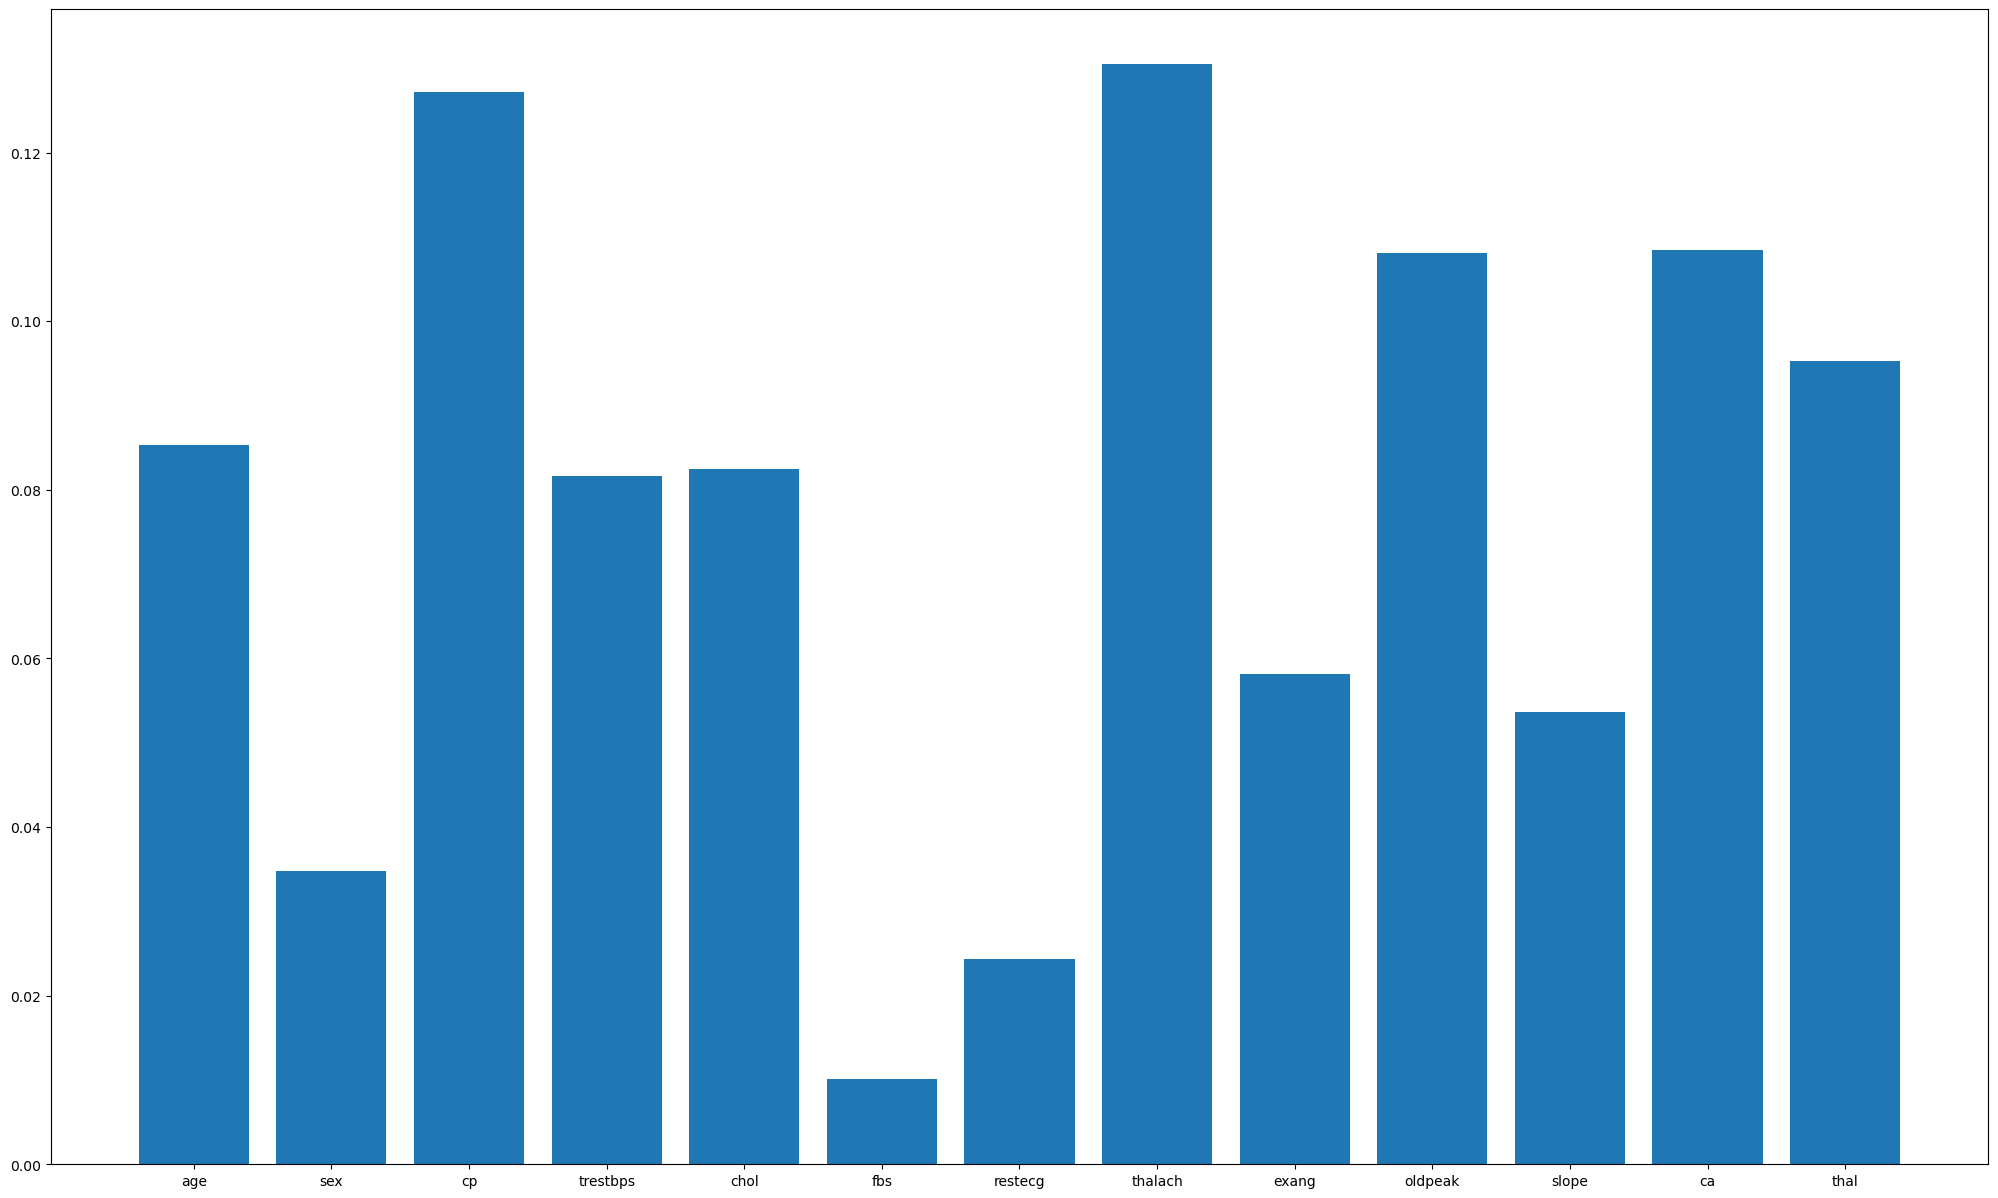

In [51]:
s={'age': 0.08531317,
 'sex': 0.03478529,
 'cp': 0.12724405,
 'trestbps': 0.08161965,
 'chol': 0.08249603,
 'fbs': 0.01010536,
 'restecg': 0.02433851,
 'thalach': 0.13048056,
 'exang': 0.05812428,
 'oldpeak': 0.10811643,
 'slope':0.05360709, 
 'ca': 0.10842666,
 'thal': 0.09534291
  }
f1=list(s.keys())
f2=list(s.values())
plt.figure(figsize=(25,15))
plt.bar(f1,f2)